In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson
from ipywidgets import interact, FloatSlider, IntSlider
import plotly.express as px

In [10]:
pd.options.display.max_columns = None

In [15]:
burglaries=pd.read_csv('tracts.csv')
burglaries

,Unnamed: 0.1,index_left,Unnamed: 0,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,latitude,longitude,zip_code,rpa,zone,location_code,location_description,offense_number,offense_nibrs,offense_description,weapon_primary,weapon_description,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,lng,lat,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Name,Population,state,county,median_income,rate,total,per_1000
0,0,997.0,3890.0,20220123952_11,2.022012e+10,D,DISPATCHED,O,OPEN,Open,2022-03-17T02:30:00.000,2022-03-17T03:10:00.000,WALLACE RD,36.080,-86.720,NaN,NaN,NaN,90.0,APARTMENT,1.0,220.0,BURGLARY- AGGRAVATED,17,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"-86.72, 36.08",-86.720,36.080,47,37,19004,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,36.069945,-86.714069,"POLYGON ((-86.72631799999999 36.079608, -86.72...","Census Tract 190.04, Davidson County, Tennessee",4470.0,47,37,44001.0,4.470,18,4.026846
1,18,1123.0,4029.0,20220229217_11,2.022023e+10,D,DISPATCHED,O,OPEN,Open,2022-05-09T22:00:00.000,2022-05-10T12:45:00.000,STONER VLY,36.200,-86.610,NaN,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,220.0,BURGLARY- AGGRAVATED,16,Unarmed,1.0,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"-86.61, 36.2",-86.610,36.200,47,37,15404,47037015404,154.04,Census Tract 154.04,G5020,S,3857659,0,36.197633,-86.614497,"POLYGON ((-86.633378 36.186178999999996, -86.6...","Census Tract 154.04, Davidson County, Tennessee",2810.0,47,37,47930.0,2.810,6,2.135231
2,24,611.0,2446.0,20220293433_12,2.022029e+10,D,DISPATCHED,O,OPEN,Open,2022-06-14T12:30:00.000,2022-06-14T20:25:00.000,OAKLEY DR,36.060,-86.750,NaN,NaN,NaN,90.0,APARTMENT,1.0,220.0,BURGLARY- AGGRAVATED,16,Unarmed,2.0,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,"-86.75, 36.06",-86.750,36.060,47,37,18801,47037018801,188.01,Census Tract 188.01,G5020,S,8463283,0,36.060991,-86.757131,"POLYGON ((-86.77516299999999 36.05341, -86.775...","Census Tract 188.01, Davidson County, Tennessee",5501.0,47,37,96942.0,5.501,1,0.181785
3,25,1140.0,4048.0,20220408734_11,2.022041e+10,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2022-08-17T22:28:00.000,2022-08-17T23:22:00.000,405 405,36.158,-86.799,37203.0,NaN,NaN,90.0,APARTMENT,1.0,220.0,BURGLARY- AGGRAVATED,09,PERSONAL (HANDS),1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,"-86.799, 36.158",-86.799,36.158,47,37,14400,47037014400,144.00,Census Tract 144,G5020,S,1912531,0,36.157595,-86.805739,"POLYGON ((-86.822525 36.153039, -86.8221959999...","Census Tract 144, Davidson County, Tennessee",2367.0,47,37,45960.0,2.367,11,4.647233
4,36,462.0,2275.0,20220228744_11,2.022023e+10,D,DISPATCHED,O,OPEN,Open,2022-05-10T03:14:00.000,2022-05-10T08:20:00.000,DICKERSON PIKE,36.210,-86.770,NaN,NaN,NaN,14.0,"HOTEL, MOTEL, ETC.",1.0,220.0,BURGLARY- AGGRAVATED,17,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,"-86.77, 36.21",-86.770,36.210,47,37,11001,47037011001,110.01,Census Tract 110.01,G5020,S,7509312,13081,36.222714,-86.753560,"POLYGON ((-86.77646299999999 36.206646, -86.77...","Census Tract 110.01, Davidson County, Tennessee",6912.0,47,37,50884.0,6.912,13,1.880787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1015,874.0,3757.0,20220100340_11,2.022010e+10,D,DISPATCHED,O,OPEN,Open,2022-03-04T08:00:00.000,2022-03-04T19:36:00.000,SWYNFORD CT,36.020,-86.740,NaN,8623.0,825.0,22.0,"RESIDENCE, HOME",1.0,220.0,BURGLARY- AGGRAVATED,17,NONE,1.0,False,I,INDIVIDUAL (18 AND OVER),F,I,Non-Hispanic,RESIDENT,"-86.74, 36.02",-86.740,36.020,47,37,19115,47037019115,191.15,Cens

In [16]:
burglaries['TRACTCE'].nunique()

170

In [33]:
bu_summary = (
    burglaries
    .assign(group = pd.qcut(burglaries['median_income'],
                            q = 10,
                           duplicates = 'drop'))
    .groupby('group')
    [['median_income', 'per_1000']]
    .mean()
    .reset_index()
)

bu_summary

,group,median_income,per_1000
0,"(13749.999, 38951.1]",28729.058824,3.323112
1,"(38951.1, 46749.6]",43338.411765,3.112761
2,"(46749.6, 51028.9]",48479.352941,1.135984
3,"(51028.9, 55249.6]",53071.941176,2.685978
4,"(55249.6, 60072.0]",57604.647059,1.743533
5,"(60072.0, 65577.8]",62374.411765,1.573207
6,"(65577.8, 74996.2]",70782.705882,1.487943
7,"(74996.2, 85752.0]",80240.058824,1.019944
8,"(85752.0, 107205.6]",96926.941176,0.900191
9,"(107205.6, 199643.0]",138605.058824,0.605223


In [34]:
pr_burg = smf.glm('per_1000 ~ median_income',
                 data = burglaries,
                 family = sm.families.Poisson()
                 ).fit()

pr_burg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               per_1000   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -284.52
Date:                Thu, 10 Nov 2022   Deviance:                       199.98
Time:                        20:18:05   Pearson chi2:                     289.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2685
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6087      0.157     10.262      0.000       1.301       1.916
median_income -1.702e-05    2.6e-06     -6.555      0.000   -2.21e-05   -1.19e-05
=================================================================================
"""

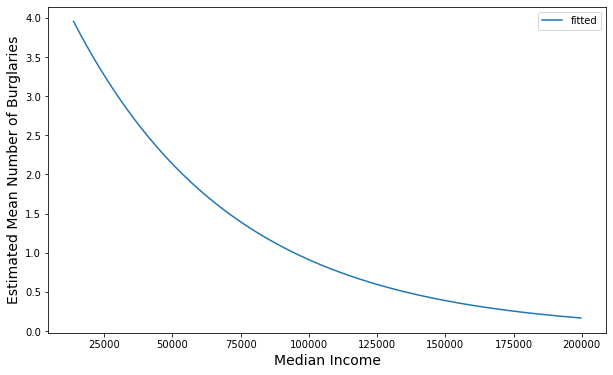

In [19]:
fit_df = pd.DataFrame({
    'median_income': np.linspace(start = burglaries['median_income'].min(),
                       stop = burglaries['median_income'].max(),
                       num = 150)
})
fit_df['fitted'] = pr_burg.predict(fit_df)

fit_df.plot(x = 'median_income', y = 'fitted', figsize = (10,6))

fontsize = 14
plt.xlabel('Median Income', fontsize = fontsize)
plt.ylabel('Estimated Mean Number of Burglaries', fontsize = fontsize);

In [20]:
@interact(median_income = IntSlider(value = 40, min = burglaries['median_income'].min(), max = burglaries['median_income'].max()))
def fit_plot(median_income):
    
    mu = np.exp(pr_burg.params['Intercept'] + median_income * pr_burg.params['median_income'])
    x = np.arange(start = 0, stop = 10, step = 1)
    y = poisson.pmf(x, mu = mu)

    plt.figure(figsize = (10,5))
    plt.bar(x, y, edgecolor = 'black')
    plt.xticks(x)
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Probability')
    plt.title(f'Estimated Distribution of Number of Burglaries\nmedian_income = {median_income}\n$\mu$={round(mu, 3)}');

interactive(children=(IntSlider(value=13750, description='median_income', max=199643, min=13750), Output()), _…

In [35]:
dv_summary = (
    burglaries
    .assign(group = pd.qcut(burglaries['median_income'],
                            q = 10,
                           duplicates = 'drop'))
    .groupby('group')
    [['median_income', 'per_1000']]
    .mean()
    .reset_index()
)

dv_summary['fitted'] = pr_burg.predict(dv_summary)

dv_summary

,group,median_income,per_1000,fitted
0,"(13749.999, 38951.1]",28729.058824,3.323112,3.063851
1,"(38951.1, 46749.6]",43338.411765,3.112761,2.389317
2,"(46749.6, 51028.9]",48479.352941,1.135984,2.189130
3,"(51028.9, 55249.6]",53071.941176,2.685978,2.024523
4,"(55249.6, 60072.0]",57604.647059,1.743533,1.874202
5,"(60072.0, 65577.8]",62374.411765,1.573207,1.728057
6,"(65577.8, 74996.2]",70782.705882,1.487943,1.497625
7,"(74996.2, 85752.0]",80240.058824,1.019944,1.274951
8,"(85752.0, 107205.6]",96926.941176,0.900191,0.959715
9,"(107205.6, 199643.0]",138605.058824,0.605223,0.472121


In [36]:
pr_burg_pop = smf.glm('per_1000 ~ median_income + Population',
                 data = burglaries,
                 family = sm.families.Poisson()
                 ).fit()

pr_burg_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               per_1000   No. Observations:                  170
Model:                            GLM   Df Residuals:                      167
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.80
Date:                Thu, 10 Nov 2022   Deviance:                       158.55
Time:                        20:18:26   Pearson chi2:                     188.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4267
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5295      0.203     12.465      0.000       2.132       2.927
median_income -1.387e-05   2.44e-06     -5.675      0.000   -1.87e-05   -9.08e-06
Population       -0.0003   4.75e-05     -6.198      0.000      -0.000      -0.000
=================================================================================
"""

In [37]:
from scipy.stats import chi2
def dd_test(reduced_model, full_model):
    G2 = -2 * (reduced_model.llf - full_model.llf)
    df = full_model.df_model - reduced_model.df_model
    return chi2.sf(G2, df = df)

In [38]:
dd_test(pr_burg, pr_burg_pop)

1.22003867714246e-10

In [39]:
offset_burg = smf.glm('per_1000 ~ median_income',
                data = burglaries,
                offset = np.log(burglaries['Population']),
                family = sm.families.Poisson()).fit()

offset_burg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               per_1000   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -345.35
Date:                Thu, 10 Nov 2022   Deviance:                       321.63
Time:                        20:19:07   Pearson chi2:                     661.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3215
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.4925      0.166    -39.000      0.000      -6.819      -6.166
median_income -2.033e-05   2.78e-06     -7.308      0.000   -2.58e-05   -1.49e-05
=================================================================================
"""

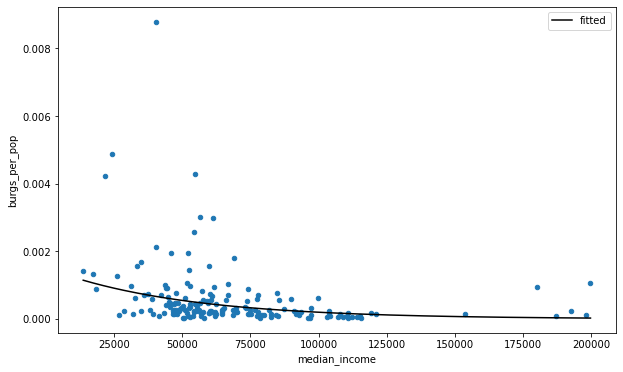

In [40]:
burglaries['burgs_per_pop'] = burglaries['per_1000'] / burglaries['Population']

fit_df = pd.DataFrame({
    'median_income': np.linspace(start = burglaries['median_income'].min(),
                      stop = burglaries['median_income'].max(),
                      num = 150)
})
fit_df['fitted'] = offset_burg.predict(fit_df)

ax = burglaries.plot(x = 'median_income', y = 'burgs_per_pop', kind = 'scatter', figsize = (10,6))
fit_df.plot(x = 'median_income', y = 'fitted', color = 'black', ax = ax);

In [41]:
offset_burg.params

Intercept       -6.492484
median_income   -0.000020
dtype: float64

In [43]:
np.exp(-0.00002)

0.9999800001999987

In [42]:
neg_binom = smf.glm('per_1000 ~ median_income',
                 data = burglaries,
                 family = sm.families.NegativeBinomial(alpha=0.3)
                 ).fit()

neg_binom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               per_1000   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -277.31
Date:                Thu, 10 Nov 2022   Deviance:                       119.44
Time:                        20:19:59   Pearson chi2:                     185.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1748
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5070      0.195      7.720      0.000       1.124       1.890
median_income -1.537e-05   3.04e-06     -5.057      0.000   -2.13e-05   -9.41e-06
=================================================================================
"""

In [44]:
dv_summary = (
    burglaries
    .assign(group = pd.qcut(burglaries['median_income'],
                            q = 10,
                           duplicates = 'drop'))
    .groupby('group')
    [['median_income', 'per_1000']]
    .mean()
    .reset_index()
)

dv_summary['fitted'] = neg_binom.predict(dv_summary)

dv_summary

,group,median_income,per_1000,fitted
0,"(13749.999, 38951.1]",28729.058824,3.323112,2.902081
1,"(38951.1, 46749.6]",43338.411765,3.112761,2.318373
2,"(46749.6, 51028.9]",48479.352941,1.135984,2.142222
3,"(51028.9, 55249.6]",53071.941176,2.685978,1.996210
4,"(55249.6, 60072.0]",57604.647059,1.743533,1.861863
5,"(60072.0, 65577.8]",62374.411765,1.573207,1.730242
6,"(65577.8, 74996.2]",70782.705882,1.487943,1.520465
7,"(74996.2, 85752.0]",80240.058824,1.019944,1.314749
8,"(85752.0, 107205.6]",96926.941176,0.900191,1.017298
9,"(107205.6, 199643.0]",138605.058824,0.605223,0.536070


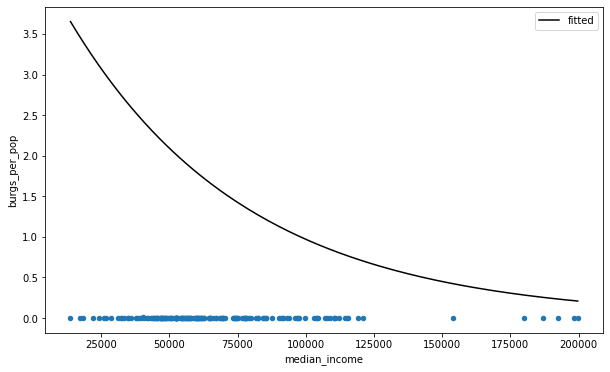

In [45]:
burglaries['burgs_per_pop'] = burglaries['per_1000'] / burglaries['Population']

fit_df = pd.DataFrame({
    'median_income': np.linspace(start = burglaries['median_income'].min(),
                      stop = burglaries['median_income'].max(),
                      num = 150)
})
fit_df['fitted'] = neg_binom.predict(fit_df)

ax = burglaries.plot(x = 'median_income', y = 'burgs_per_pop', kind = 'scatter', figsize = (10,6))
fit_df.plot(x = 'median_income', y = 'fitted', color = 'black', ax = ax);